$\textbf{3. Cuadratura Gaussiana}$

**3.1** Cuadratura Gauss-Laguerre



In [2]:
import numpy as np
import sympy as sym

x = sym.Symbol('x',real=True)

def GetLaguerre(n,x):
    if(n == 0):
        return 1
    if(n == 1):
        return 1-x
    return ((2*n - 1 - x)*(GetLaguerre(n-1,x)) - (n-1)*GetLaguerre(n-2,x))/n

def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

def GetRootsGLag(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
    
        croot = np.round( root, tolerancia )
        
        if croot not in Roots:
            Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots


def GetAllRootsGLag(n):
    xn = np.linspace(0,n+(n-1)*np.sqrt(n),100)

    Laguerre = []
    DLaguerre = []

    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRootsGLag(poly,Dpoly,xn)
    
    return Roots

def GetWeightsGLag(n):
    Roots = GetAllRootsGLag(n)

    Laguerre = []
    
    for i in range(n+2):
        Laguerre.append(GetLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n+1],'numpy')
    Weights = Roots/(((n+1)**2)*(poly(Roots))**2)
    return Weights

**3.2** Cuadratura Gauss-Hermite

In [15]:
def GetHermite(n,x):
    if(n == 0):
        return 1
    if(n == 1):
        return 2*x
    he = GetHermite(n-1,x)
    difhe = sym.diff(he)
    return (2*x*GetHermite(n-1,x))-difhe

def GetDHermite(n,x):
    Pn = GetHermite(n,x)
    return sym.diff(Pn,x,1)

def GetRootsGHer(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
    
        croot = np.round( root, tolerancia )
        
        if croot not in Roots:
            Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots


def GetAllRootsGHer(n):
    xn = np.linspace(-np.sqrt(4*n+1),np.sqrt(4*n+1),100)

    Hermite = []
    DHermite = []

    for i in range(n+1):
        Hermite.append(GetHermite(i,x))
        DHermite.append(GetDHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n],'numpy')
    Dpoly = sym.lambdify([x],DHermite[n],'numpy')
    Roots = GetRootsGHer(poly,Dpoly,xn)
    
    return Roots

def GetWeightsGHer(n):
    Roots = GetAllRootsGHer(n)

    Hermite = []
    
    for i in range(n+2):
        Hermite.append(GetHermite(i,x))
    
    poly = sym.lambdify([x],Hermite[n-1],'numpy')
    Weights = (2**(n-1)*np.math.factorial(n)*np.sqrt(np.pi))/(n**2*(poly(Roots)**2))
    return Weights

1.3803900759356533


**3.3** Aplicación

3.3.1
 
 $u = \frac{Mv^2}{2RT}$

 $v^2 = \frac{2RTu}{M}$

 $v = \sqrt{\frac{2RTu}{M}}$

 $dv = \frac{1}{2\frac{2RTu}{M}} \frac{2RT}{M}$

 Realizando la sustitución y simplificando términos:

 $4\pi(\frac{M}{2\pi RT})^{3/2} \int_{0}^{\inf} \frac{2RTu}{M} \frac{1}{2\frac{2RTu}{M}} \frac{2RT}{M} e^{-u} du$

 $2\pi^{-1/2} \int_{0}^{\inf} \sqrt{u} e^{-u} du$

 Usando Gauss-Laguerre:



In [16]:
raices = GetAllRootsGLag(5)
pesos = GetWeightsGLag(5)


funcion = lambda x: 2*np.pi**(-1/2)*np.sqrt(x)

I = 0
for i in range(5):
    I += pesos[i]*funcion(raices[i])

print(I)

1.0105058620633836


3.3.2

tomando $M = 1$ y $ R = 1$:

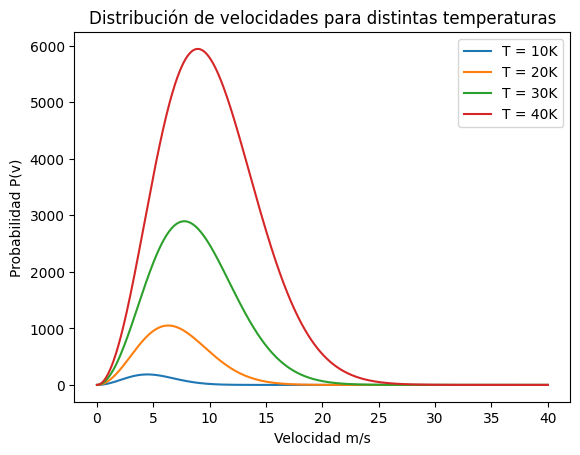

In [72]:
import matplotlib.pyplot as plt

v = np.linspace(0,40,1000)
def pv(v,T):
    return 4*np.pi*(1/(2*np.pi*1)*T)**(3/2)*v**2*np.exp((-v**2)/(2*1*T))

T1 = 10
T2 = 20
T3 = 30
T4 = 40

P1 = pv(v,T1)
P2 = pv(v,T2)
P3 = pv(v,T3)
P4 = pv(v,T4)

plt.figure(dpi=100)
plt.plot(v,P1)
plt.plot(v,P2)
plt.plot(v,P3)
plt.plot(v,P4)
plt.legend(["T = 10K","T = 20K","T = 30K","T = 40K",])
plt.xlabel("Velocidad m/s")
plt.ylabel("Probabilidad P(v)")
plt.title("Distribución de velocidades para distintas temperaturas")


plt.show()

Al aumentar la temperatura, la velocidad más probable también aumenta. Dicho de otra forma, el pico de la gráfica se desplaza hacia la derecha.

3.3.3

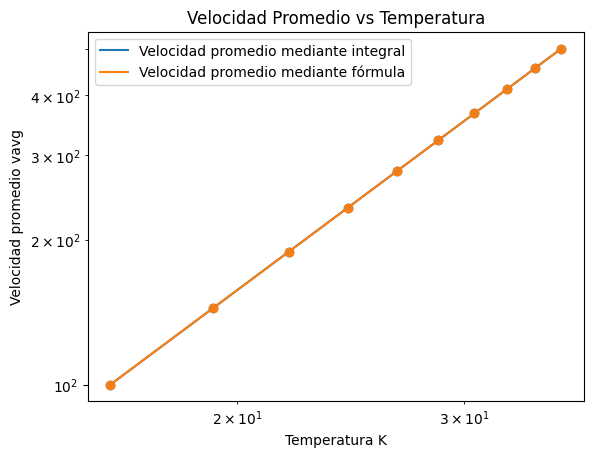

In [94]:
temperaturas = np.linspace(100,500,10)
form = np.sqrt(8*temperaturas/np.pi)

avgs=[]

for t in temperaturas:
    vavg = lambda x: np.sqrt(2*t*x)*2*np.pi**(-1/2)*np.sqrt(x)
    a = 0
    for j in range(5):
        a += pesos[j]*vavg(raices[j])
    avgs.append(a)

plt.figure(dpi=100)
plt.plot(avgs, temperaturas)
plt.plot(form, temperaturas)
plt.scatter(avgs, temperaturas)
plt.scatter(form, temperaturas)
plt.xscale('log')
plt.yscale('log')
plt.legend(["Velocidad promedio mediante integral", "Velocidad promedio mediante fórmula"])
plt.title("Velocidad Promedio vs Temperatura")
plt.xlabel("Temperatura K")
plt.ylabel("Velocidad promedio vavg")
plt.show()
    

3.3.4

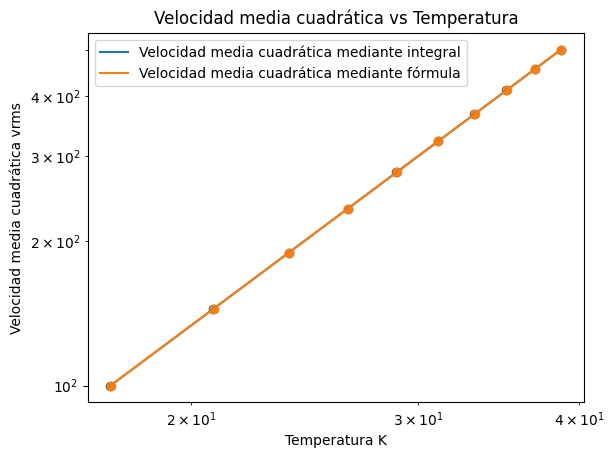

In [98]:
temperaturas = np.linspace(100,500,10)
formrms = np.sqrt(3*temperaturas)

rms = []

for t in temperaturas:
    vrms = lambda x: 2*t*x*2*np.pi**(-1/2)*np.sqrt(x)
    r = 0
    for j in range(5):
        r += pesos[j]*vrms(raices[j])
    rms.append(np.sqrt(r))

plt.figure(dpi=100)
plt.plot(rms, temperaturas)
plt.plot(formrms, temperaturas)
plt.scatter(rms, temperaturas)
plt.scatter(formrms, temperaturas)
plt.xscale('log')
plt.yscale('log')
plt.legend(["Velocidad media cuadrática mediante integral", "Velocidad media cuadrática mediante fórmula"])
plt.title("Velocidad media cuadrática vs Temperatura")
plt.xlabel("Temperatura K")
plt.ylabel("Velocidad media cuadrática vrms")
plt.show()

3.3.5


La energía interna de un gas $E_{int}$ será igual a la suma de las energías de las moléculas que lo componen. Asumiendo un gas ideal monoatómico, entonces todas sus moléculas internas serán iguales y tendrán igual energía. Por lo tanto, $E_{int} = nE_{part}$ donde n es el número de moléculas del gas y $E_{part}$ la energía de cada molécula. Asumiendo un modelo libre del gas, entonces la energía de cada molécula será unicamente su energía cinética, $E_{part} = K_{part}$.

Partiendo de la fórmula de la energía cinética $K = \frac{1}{2}mv^2$, y reemplazando v con la fórmula para la velocidad media cuadrática se tiene:

$K_{part} = \frac{1}{2}m\left(\sqrt{\frac{3RT}{m}}\right)^2$

$K_{part} = \frac{1}{2}m{\frac{3RT}{m}}$

$K_{part} = \frac{3}{2}RT$

Por lo que finalmente:

$E_{int} = nK_{part}$

$E_{int} = \frac{3}{2}nRT$


